# Observasi

In [1]:
import json
import pymongo
from pymongo import MongoClient

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

# Pipeline

## category

In [3]:
with open('category.json', 'r') as out:
    data = json.load(out)
    data = data[0]

In [4]:
datas = data['data']['categoryAllListLite']['categories']

In [5]:
def find_categ_name(id):
    for data in datas:
        if str(id) == str(data['id']):
            return data['name']
    return None

In [6]:
def categ_to_name(datas):
    for data in datas:
        name = find_categ_name(data['_id'])
        data['_id'] = name
        
    return datas

# Connecting Mongo

In [7]:
client = MongoClient('localhost:9700')
db = client.tokpedstat

# common function

In [8]:
def grafik(df, dimensi=[13, 9], name=None):
    fig_dims = dimensi
    fig, ax = plt.subplots(figsize=fig_dims)

    g = sns.barplot(data = df, x='_id', y='total', ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=40)
    
    if name:
        fig.savefig('img/{}.png'.format(name))
        
    plt.show(g)

In [9]:
db.product.count()

f:\python3\environment\stattest\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


1914650

# Stat By Category

In [10]:
aggr = [
    {
        "$group": {
            "_id": "$cat_id_1",
            "total": { "$sum": 1 }
        }
    }
]

hasil = db.product.aggregate(aggr)
hasil = list(hasil)
hasil = categ_to_name(hasil)
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

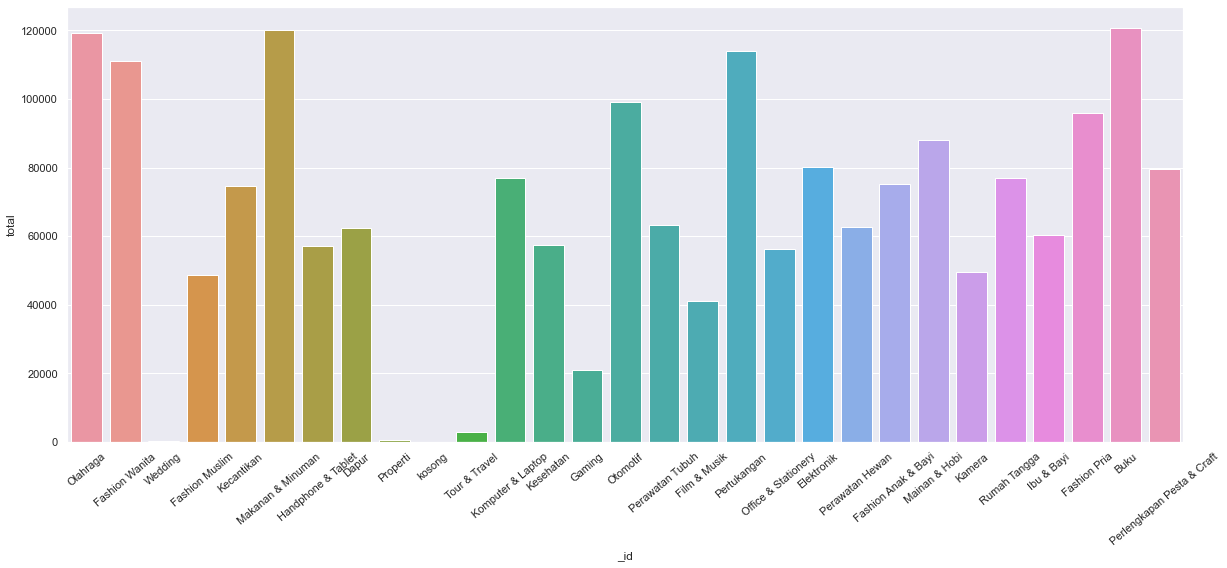

In [11]:
grafik(df, (20,8), 'kategori')

# Timeline created data

In [12]:
aggr = [
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$created" } },
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { '_id': 1 } },
]

hasilc = db.product.aggregate(aggr)
hasilc = list(hasilc)
df = pd.DataFrame.from_records(hasilc)
df = df.fillna(value='kosong')

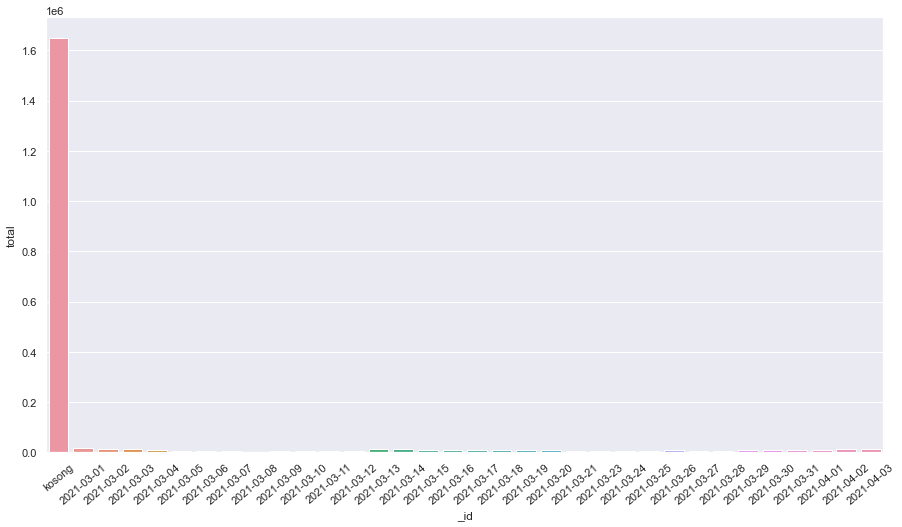

In [13]:
grafik(df, (15,8), 'created')

## Without null Value

In [14]:
cleanhasilc = list(filter(lambda x:bool(x), hasilc))
df = pd.DataFrame.from_records(cleanhasilc)
df.describe()

,total
count,3.400000e+01
mean,5.631541e+04
std,2.813762e+05
min,2.217000e+03
25%,4.987000e+03
50%,8.254000e+03
75%,1.061550e+04
max,1.648620e+06


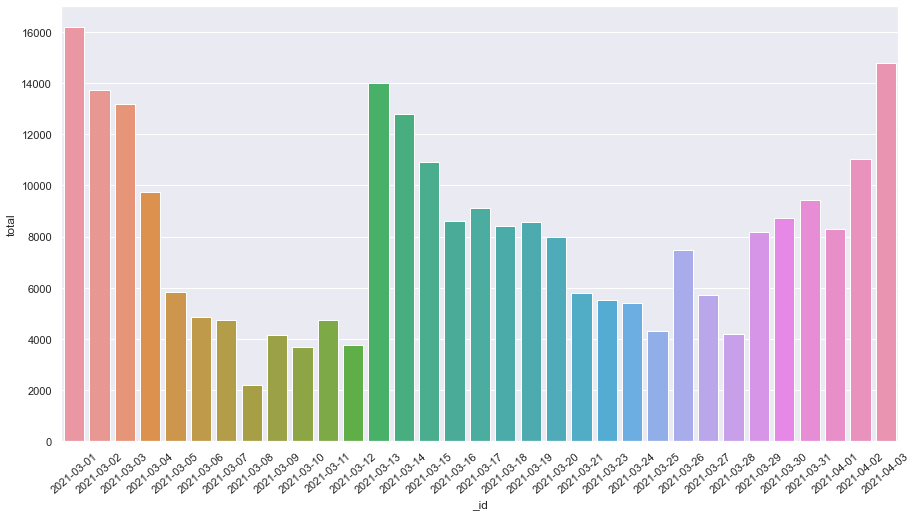

In [15]:
grafik(df, (15,8), 'created_not_null')

# Checking Last up Data

In [36]:
aggr = [ 
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$last_updated" } },
            "total": { "$sum": 1 }
        }
    }
]

hasillast = db.product.aggregate(aggr)
hasillast = list(hasillast)
df = pd.DataFrame.from_records(hasillast)
df = df.fillna(value='kosong')
df.describe()

,total
count,6.000000e+00
mean,3.191362e+05
std,6.566284e+05
min,1.000000e+00
25%,1.000000e+00
50%,1.500000e+00
75%,2.056235e+05
max,1.640648e+06


In [37]:
# hasillast = [
#     {
#         '_id': '2021-03-19',
#         'total': 296237
#     },
    
#     {
#         '_id': '2021-03-20',
#         'total': 396237
#     },
    
#     {
#         '_id': '2021-03-21',
#         'total': 1381186
#     },
    
# ]
# df = pd.DataFrame.from_records(hasillast)
# grafik(df, (15,8), 'last_updated')

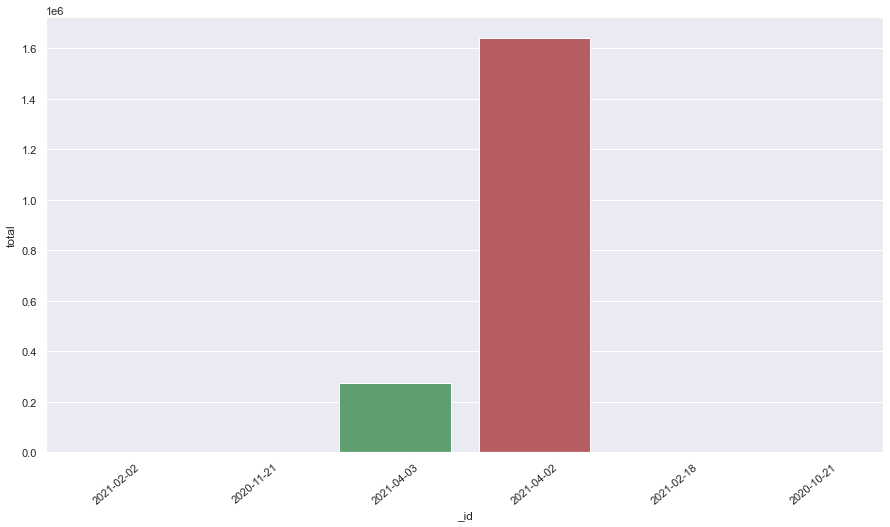

In [38]:
grafik(df, (15,8), 'last_updated')

# Statistik Toko

In [19]:
aggr = [
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$created" } },
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { '_id': 1 } }
]

hasilc = db.toko.aggregate(aggr)
hasilc = list(hasilc)
df = pd.DataFrame.from_records(hasilc)
df = df.fillna(value='kosong')

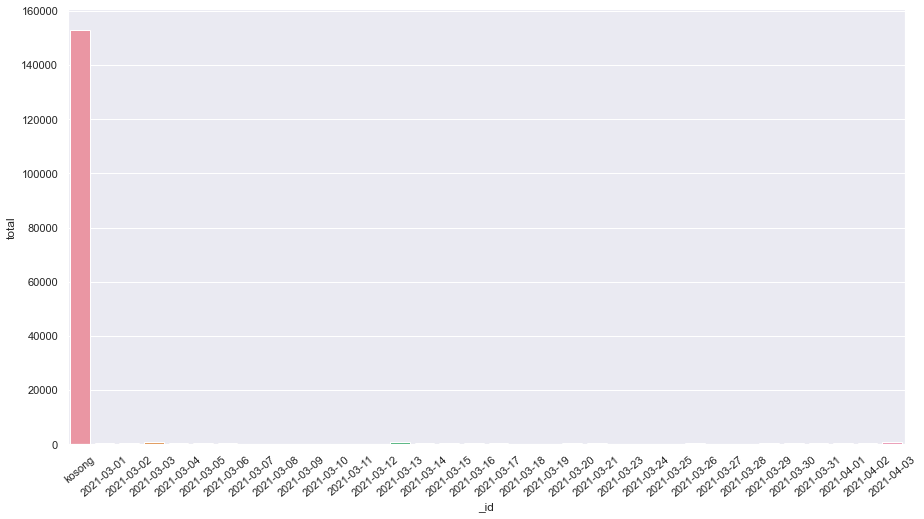

In [20]:
grafik(df, (15,8), 'shop_created')

In [21]:
cleanhasilc = list(filter(lambda x:bool(x), hasilc))
df = pd.DataFrame.from_records(cleanhasilc)

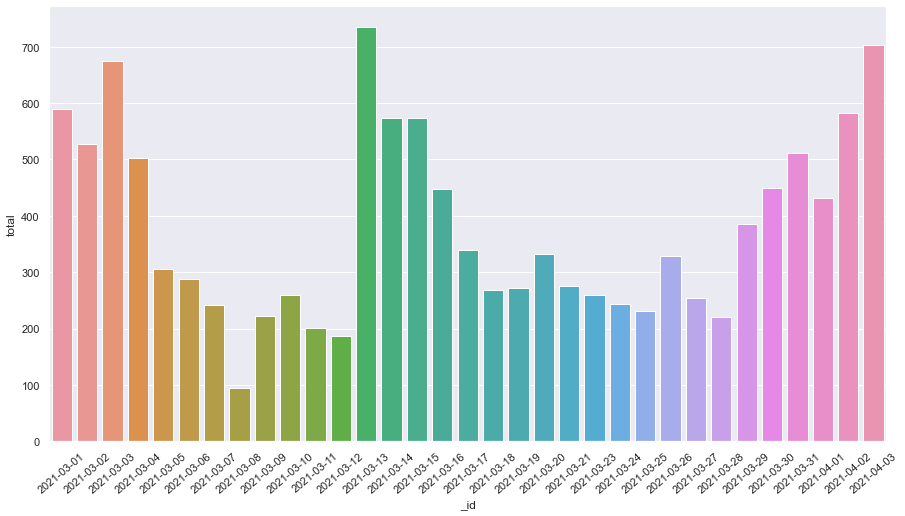

In [22]:
grafik(df, (15,8), 'shop_created_notnull')

In [23]:
aggr = [
    { "$match": { "rating": { "$gte": 5 } }},
    {
        "$group": {
            "_id": "$location",
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { "total": -1 } },
    { "$limit": 20 }
]

hasil = db.toko.aggregate(aggr)
hasil = list(hasil)

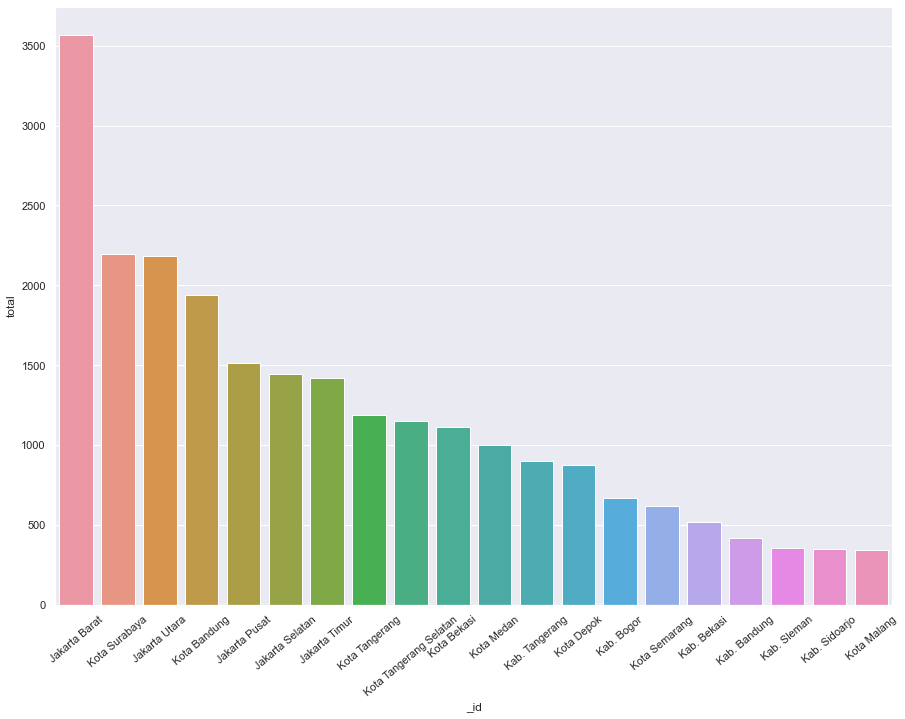

In [24]:
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

grafik(df, (15,11), 'shop_location')

# toko

In [25]:
db.toko.find_one()

{'_id': 338447,
 'shopid': 338447,
 'username': 'ferrygolf75',
 'url': 'https://tokopedia.com/ferrygolf75',
 'city_name': 'Kota Administrasi Jakarta Timur',
 'district_name': 'Makasar',
 'jum_product': 87,
 'sold': 5017,
 'tx': 2330,
 'percent_tx': 97.653,
 'location': 'Jakarta Timur',
 'rating': 4.8,
 'review': 1200,
 'score_map': 11,
 'score': 5351,
 'kep_bad': 0,
 'kep_good': 58,
 'kep_neutral': 5,
 'kecepatan': 4,
 'last_updated': datetime.datetime(2021, 4, 3, 9, 2, 40, 213000)}

In [26]:
aggr = [
    {
        "$group": {
            "_id": "$kecepatan",
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { "total": -1 } },
    { "$limit": 20 }
]

hasil = db.toko.aggregate(aggr)
hasil = list(hasil)

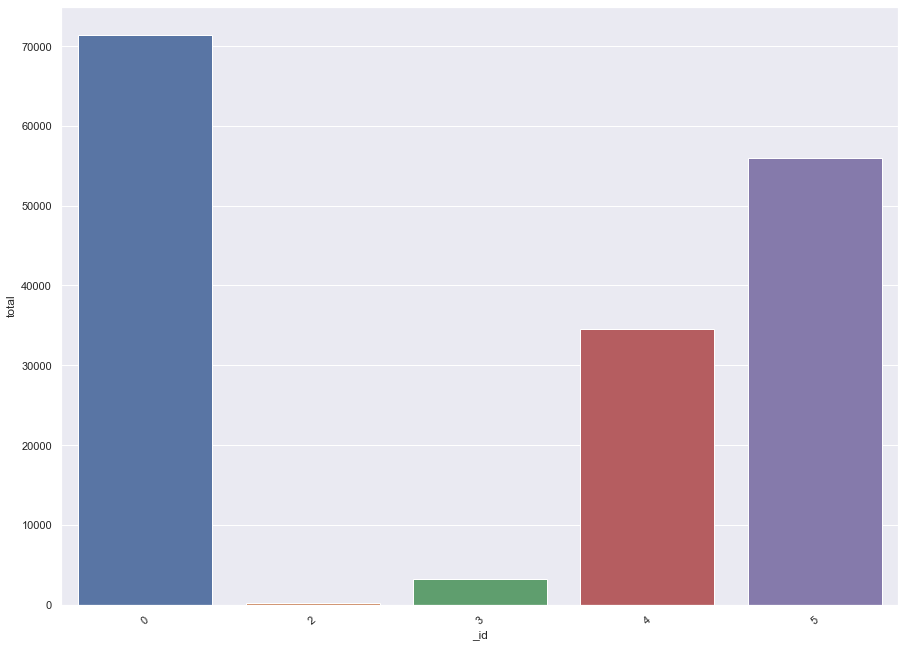

In [27]:
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

fig_dims = (15, 11)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(data = df, x='_id', y='total', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
plt.show(g)

# query data

In [28]:
db.product.count()

f:\python3\environment\stattest\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


1914795

# stat produk 

In [29]:
db.product.find_one()

{'_id': 406936069,
 'shop': {'_id': 338447,
  'username': 'ferrygolf75',
  'percent_tx': 97.651,
  'location': 'Jakarta Timur',
  'rating': 4.8,
  'score_map': 11,
  'kecepatan': 4},
 'itemid': 406936069,
 'name': 'Tee Karet Driving Golf Rubber 5,6,7',
 'price': 25000,
 'shopid': 338447,
 'url': 'https://www.tokopedia.com/ferrygolf75/tee-karet-driving-golf-rubber-5-6-7',
 'description': '',
 'weight': 10,
 'last_updated': datetime.datetime(2021, 4, 3, 1, 19, 43, 94000),
 'images': ['https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_5d85ec8d-51a1-41aa-bfd4-a0dfb66c7e40_720_720.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_2dc40ee1-5111-4659-a9e6-6f0f60fa068d_720_720.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_8e096802-772f-42f2-8c20-586639d6dbeb_720_720.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_25a8d992-2bc3-43c7-a2f8-5c17dc6506b1_720_720.jpg']

# insight Produk

In [30]:
import requests
from PIL import Image
import io

In [31]:
def get_image(url):
    res = requests.get(url, stream=True)
    image = Image.open(io.BytesIO(res.content))
    return image

In [32]:
def plotting_prod(products):
    for prod in products:
        
        image = get_image(prod['images'][0])
        
        display(image)
        print('Harga : {}'.format(prod['price']))
        print('Name : {}'.format(prod['name']))
    

In [33]:
products = db.product.find({ '$text': { '$search': "gamis kafir" } } ).sort("sold_day_3", pymongo.DESCENDING).limit(10)
products = list(products)

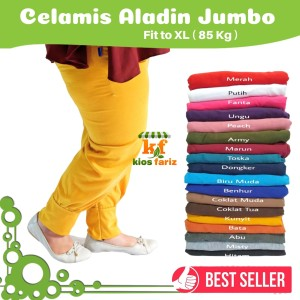

Harga : 16900
Name : Aladin Jumbo / Celamis Aladin / Dalaman gamis / Celana Santai /Legging


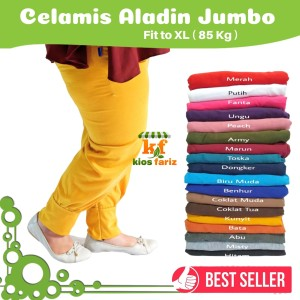

Harga : 16900
Name : Aladin Jumbo / Celamis Aladin / Dalaman gamis / Celana Santai /Legging - Putih


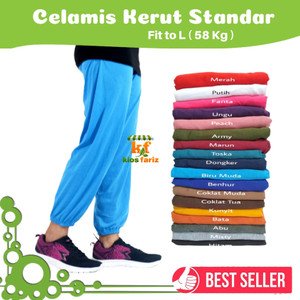

Harga : 15900
Name : Serut Standar / Celamis Serut / Cumi / Dalaman gamis / Celana Santai - Putih


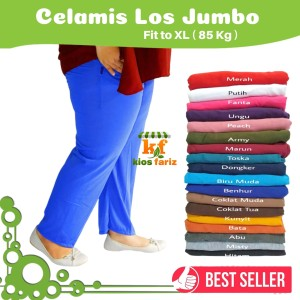

Harga : 16900
Name : Polos Jumbo / Celamis Polos / Dalaman gamis / Celana Santai / Legging - Putih


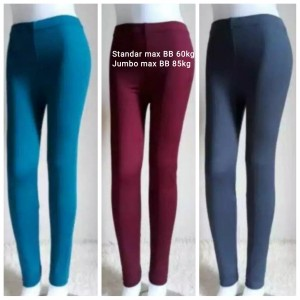

Harga : 17000
Name : Celana Legging Panjang Wanita/bhn Spandex Tebal dan adem/dalaman gamis - Hitam, Standar


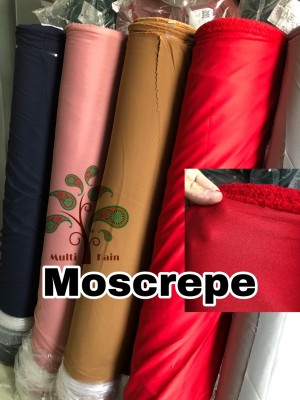

Harga : 10750
Name : bahan kain moscrepe mosscrepe moscrep mos crepe woven gamis fashion - 40 hitam


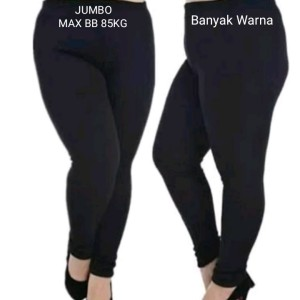

Harga : 19000
Name : Celana Legging Panjang Wanita/Dalaman Gamis/Spandex Tebal Adem/Jumbo - Pilih Warna, Jumbo


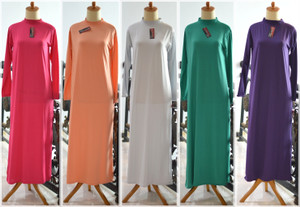

Harga : 55000
Name : Dalaman Gamis baju muslim kaftan manset panjang inner terusan halus


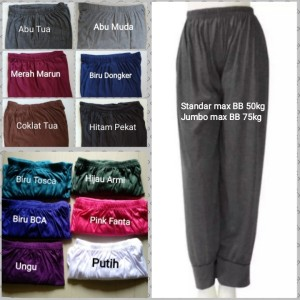

Harga : 17000
Name : Celana Aladin Panjang Wanita/Dalaman Gamis/Nyaman dipakai Murah Bagus - Pilih Warna, Standar


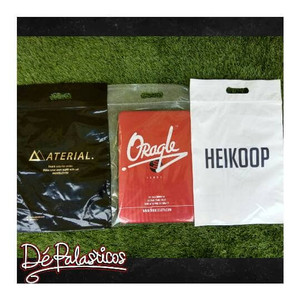

Harga : 1550
Name : PLASTIK KLIP KEMASAN ZIPLOCK BAJU / GAMIS / JAKET / SEPATU + SABLON - Hitam


In [34]:
plotting_prod(products)